<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/Week10/CNN_Example_Tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/data/'

Mounted at /content/gdrive


In [ ]:
input_shape = (28, 28, 1)

#Define the model achitecture
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu')) # (32 *64+(3*3))+64
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=["accuracy"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               524416    
                                                      

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv(path+'digit.csv',header=None)
digit =np.reshape(np.array(data.iloc[:,:-1]),[500,28,28,1])
digit=digit/255.0

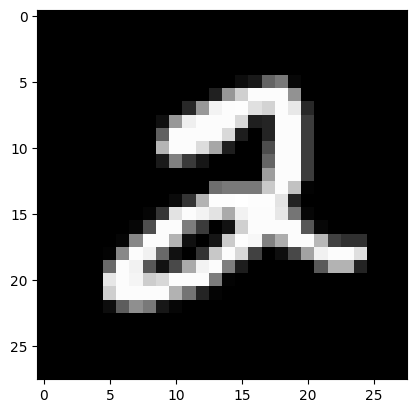

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(digit[100,:,:],[28,28]),cmap='gray')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, Y_train, Y_test=train_test_split(digit,data.iloc[:,-1].values,test_size=0.2)

In [ ]:
from keras import utils
y_train = keras.utils.to_categorical(Y_train, num_classes=10)
y_test = keras.utils.to_categorical(Y_test, num_classes=10)

In [ ]:
Y_test

array([3, 0, 1, 7, 9, 9, 6, 7, 5, 4, 0, 1, 2, 0, 9, 8, 9, 3, 2, 8, 1, 2,
       3, 0, 8, 9, 0, 6, 8, 1, 4, 6, 2, 4, 5, 9, 2, 2, 1, 7, 4, 7, 1, 4,
       1, 4, 5, 5, 6, 9, 6, 4, 9, 4, 3, 7, 8, 3, 9, 8, 0, 0, 9, 3, 5, 1,
       7, 5, 1, 6, 1, 9, 3, 3, 7, 1, 0, 8, 6, 0, 6, 4, 0, 9, 2, 5, 4, 6,
       3, 1, 7, 1, 7, 8, 7, 6, 3, 4, 9, 2])

In [ ]:
y_test

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 

In [ ]:
Y_test

array([3, 0, 1, 7, 9, 9, 6, 7, 5, 4, 0, 1, 2, 0, 9, 8, 9, 3, 2, 8, 1, 2,
       3, 0, 8, 9, 0, 6, 8, 1, 4, 6, 2, 4, 5, 9, 2, 2, 1, 7, 4, 7, 1, 4,
       1, 4, 5, 5, 6, 9, 6, 4, 9, 4, 3, 7, 8, 3, 9, 8, 0, 0, 9, 3, 5, 1,
       7, 5, 1, 6, 1, 9, 3, 3, 7, 1, 0, 8, 6, 0, 6, 4, 0, 9, 2, 5, 4, 6,
       3, 1, 7, 1, 7, 8, 7, 6, 3, 4, 9, 2])

In [ ]:
model.fit(X_train, y_train, epochs=200, verbose=1,validation_data=(X_test, y_test))


Epoch 1/200
13/13 [==============================] - 4s 255ms/step - loss: 2.0622 - accuracy: 0.2850 - val_loss: 1.3575 - val_accuracy: 0.7800
Epoch 2/200
13/13 [==============================] - 2s 136ms/step - loss: 1.2661 - accuracy: 0.5925 - val_loss: 0.7157 - val_accuracy: 0.8500
Epoch 3/200
13/13 [==============================] - 2s 127ms/step - loss: 0.8545 - accuracy: 0.7325 - val_loss: 0.4775 - val_accuracy: 0.8900
Epoch 4/200
13/13 [==============================] - 2s 122ms/step - loss: 0.5724 - accuracy: 0.8025 - val_loss: 0.3223 - val_accuracy: 0.9200
Epoch 5/200
13/13 [==============================] - 2s 127ms/step - loss: 0.4008 - accuracy: 0.8800 - val_loss: 0.2679 - val_accuracy: 0.9500
Epoch 6/200
13/13 [==============================] - 2s 175ms/step - loss: 0.3601 - accuracy: 0.8925 - val_loss: 0.2516 - val_accuracy: 0.9400
Epoch 7/200
13/13 [==============================] - 2s 128ms/step - loss: 0.2530 - accuracy: 0.9250 - val_loss: 0.2369 - val_accuracy: 0.9400

KeyboardInterrupt: ignored

13/13 [==============================] - 1s 32ms/step
Confusion Matrix


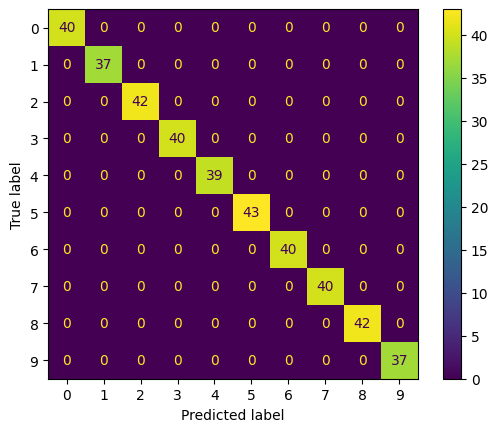

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_train)
Y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']

cm = confusion_matrix(Y_train, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()


4/4 [==============================] - 0s 24ms/step
Confusion Matrix
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00         8
           3       0.91      1.00      0.95        10
           4       1.00      1.00      1.00        11
           5       0.88      1.00      0.93         7
           6       1.00      1.00      1.00        10
           7       1.00      0.80      0.89        10
           8       1.00      1.00      1.00         8
           9       0.93      1.00      0.96        13

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



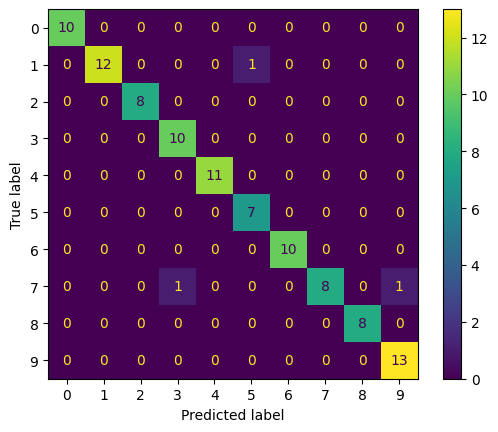

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
Y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(Y_test, Y_pred)
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
print(classification_report(Y_test, Y_pred, target_names=target_names))

In [ ]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath=path+"/weights-1-{epoch:02d}-{loss:.4f}.hdf5"

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=["accuracy"])


In [ ]:
#cb = [EarlyStopping(monitor='val_loss', patience=5)]
cb=[ModelCheckpoint(filepath=filepath, monitor='val_accuracy', save_best_only=True,mode='max',verbose=1)]

history=model.fit(X_train, y_train,epochs=20, verbose=1,validation_data=(X_test, y_test),callbacks=cb)



Epoch 1/20
13/13 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9950
Epoch 1: val_accuracy improved from -inf to 0.96000, saving model to /content/gdrive/My Drive/data/weights-1-01-0.0278.hdf5
13/13 [==============================] - 3s 140ms/step - loss: 0.0278 - accuracy: 0.9950 - val_loss: 0.2883 - val_accuracy: 0.9600
Epoch 2/20
 1/13 [=>............................] - ETA: 1s - loss: 0.0058 - accuracy: 1.0000

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


13/13 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 2: val_accuracy did not improve from 0.96000
13/13 [==============================] - 3s 202ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.3460 - val_accuracy: 0.9600
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 8.1103e-04 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.96000
13/13 [==============================] - 3s 216ms/step - loss: 8.1103e-04 - accuracy: 1.0000 - val_loss: 0.4456 - val_accuracy: 0.9600
Epoch 4/20
13/13 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9975
Epoch 4: val_accuracy did not improve from 0.96000
13/13 [==============================] - 2s 121ms/step - loss: 0.0041 - accuracy: 0.9975 - val_loss: 0.3901 - val_accuracy: 0.9600
Epoch 5/20
13/13 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9975
Epoch 5: val_accuracy improved from 0.96000 to 0.97000, saving model to /content/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 8, 8, 64)          0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 128)               524416    
                                                        

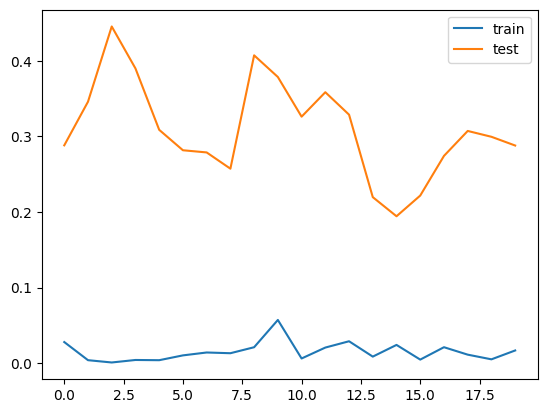

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

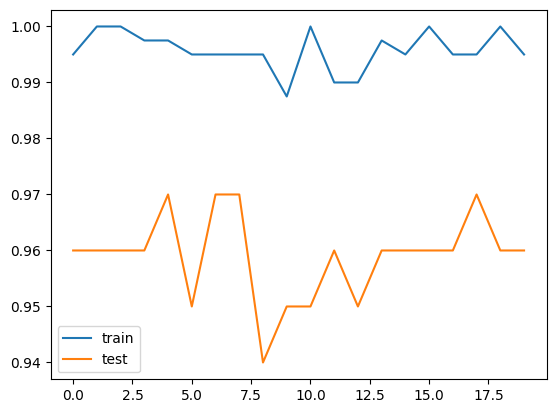

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
drive.flush_and_unmount

In [ ]:
756/150*181


In [ ]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 8, 8, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               524416    
                                                      

In [ ]:
!pip install tensorflow scikeras scikit-learn
from scikeras.wrappers import KerasClassifier


In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
def create_network(optimizer="rmsprop"):

  #Define the model achitecture
  model = Sequential()
  model.add(Conv2D(64, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu')) # (32 *64+(3*3))+64
  model.add(MaxPooling2D(pool_size=(3, 3)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=["accuracy"])
  model.summary()
  return model

In [ ]:
network=KerasClassifier(build_fn=create_network,verbose=1)
epochs=[5,10]
batches=[10,50,100]
optimizer=["rmsprop","adam"]


param_grid = dict(epochs=epochs,batch_size=batches,optimizer=optimizer)
grid = GridSearchCV(estimator=network, param_grid=param_grid, n_jobs=-1,)
grid_result = grid.fit(X_train,y_train)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 8, 8, 64)          0         
                                                                 
 flatten_5 (Flatten)         (None, 4096)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               524416    
                                                      

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5
40/40 [==============================] - 2s 42ms/step - loss: 1.8753 - accuracy: 0.3750
Epoch 2/5
40/40 [==============================] - 2s 52ms/step - loss: 0.8290 - accuracy: 0.7325
Epoch 3/5
40/40 [==============================] - 4s 103ms/step - loss: 0.4986 - accuracy: 0.8375
Epoch 4/5
40/40 [==============================] - 4s 93ms/step - loss: 0.3974 - accuracy: 0.8750
Epoch 5/5
40/40 [==============================] - 3s 75ms/step - loss: 0.3210 - accuracy: 0.9125


# New Section

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.915000 using {'batch_size': 10, 'epochs': 5, 'optimizer': 'rmsprop'}
0.915000 (0.034821) with: {'batch_size': 10, 'epochs': 5, 'optimizer': 'rmsprop'}
0.880000 (0.055678) with: {'batch_size': 10, 'epochs': 5, 'optimizer': 'adam'}
0.902500 (0.033912) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'rmsprop'}
0.895000 (0.045139) with: {'batch_size': 10, 'epochs': 10, 'optimizer': 'adam'}
0.820000 (0.034095) with: {'batch_size': 50, 'epochs': 5, 'optimizer': 'rmsprop'}
0.842500 (0.023184) with: {'batch_size': 50, 'epochs': 5, 'optimizer': 'adam'}
0.855000 (0.043012) with: {'batch_size': 50, 'epochs': 10, 'optimizer': 'rmsprop'}
0.880000 (0.046503) with: {'batch_size': 50, 'epochs': 10, 'optimizer': 'adam'}
0.805000 (0.018708) with: {'batch_size': 100, 'epochs': 5, 'optimizer': 'rmsprop'}
0.810000 (0.038243) with: {'batch_size': 100, 'epochs': 5, 'optimizer': 'adam'}
0.860000 (0.048348) with: {'batch_size': 100, 'epochs': 10, 'optimizer': 'rmsprop'}
0.862500 (0.036228) with: {'